In [1]:
function last(A)
    
   return A[length(A)] 
end


last (generic function with 1 method)

In [4]:
function rungeKutta4(f::Function,t0,tf,x0,delta)
    tArray = []
    xArray = []
    
    #=Como siempre agregamos los primeros puntos a los arreglos=#

    push!(tArray,t0)
    push!(xArray,x0)
    
    #=Definimos las funciones de Runge Kutta=#
    
    f1(x,t) = f(x,t)
    f2(x,t) = f(x+(delta/2)*f1(x,t),t+(delta/2))
    f3(x,t) = f(x+(delta/2)*f2(x,t),t+(delta/2))
    f4(x,t) = f(x+(delta)*f3(x,t),t+delta)
    
    rungeFunction(x,t) = x+(delta/6)*(f1(x,t)+2*f2(x,t) +2*f3(x,t)+f4(x,t))
    
    while(last(tArray)<tf)
        push!(xArray,rungeFunction(last(xArray),last(tArray)))
        push!(tArray,last(tArray)+delta)
        
    end
    
    return [tArray,xArray]
    
end

rungeKutta4 (generic function with 1 method)



## Ejercicio 1: Resolver con Runge-Kutta orden 4 el sistema: 
\begin{align} 
\dot x &= y-y^3\ \dot y &= -x -y^2 
\end{align}

a) Grafiquen muchas trayectorias en el espacio de fase, utilizando condiciones iniciales aleatorias.
Calculen el Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluenlo en $\vec 0$, el cual es un punto fijo. Calculen $\Delta$ y $\tau$ e indiquen que tipo de punto fijo es el $\vec 0$.

b) Calculen el Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluenlo en $\vec 0$, el cual es un punto fijo. Calculen $\Delta$ y $\tau$ e indiquen que tipo de punto fijo es el $\vec 0$.


In [2]:
#=Hacemos primero una función que nos arroje numeros aleatorios flotantes entre un número inicial y uno final =#
function randomFloat(initial::Float64, final::Float64)
    
   return initial +(final -initial)*rand() 
    
end

randomFloat (generic function with 1 method)

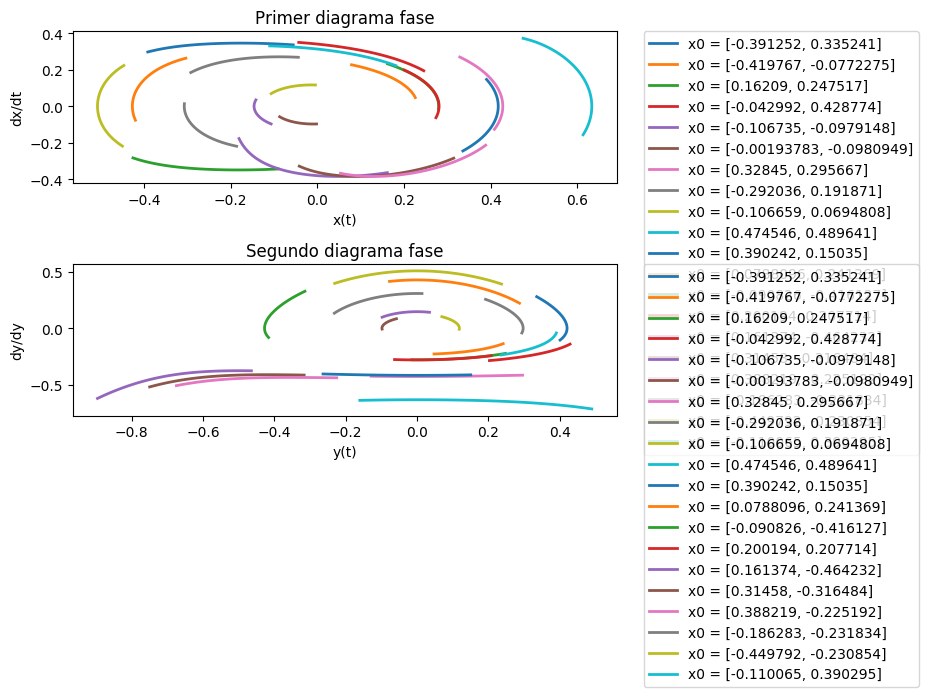

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fc381046750>

In [38]:

using PyPlot
plt = PyPlot

#Acorde al diagrama que nos dan deberiamos tener un punto silla. 
f(x,t) = [x[2]-x[2]^3,-x[1]-x[2]^2]
condicionesIniciales = []
initial = -0.5
final = 0.5
solucion = []
xCord(x) = x[1]
yCord(x)=x[2]
derivada = []
#Llenamos el arreglo de condiciones iniciales. 
for i in 1:20
    push!(condicionesIniciales,[randomFloat(initial,final),randomFloat(initial,final)])
end

for condicion in condicionesIniciales
    solucion = rungeKutta4(f,initial,final,condicion,0.01)
    derivada = f.(solucion[2],solucion[1])
    
    
    #=Primer diagrama fase=#
    plt.subplot(2,1,1)
    plt.xlabel("x(t)")
    plt.ylabel("dx/dt")
    plt.title("Primer diagrama fase")
    plt.grid()
    plt.tight_layout()
    plt.plot(xCord.(solucion[2]),xCord.(derivada),label = "x0 = $(condicion)",linewidth =2)    
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
    
    plt.subplot(2,1,2)
    plt.xlabel("y(t)")
    plt.ylabel("dy/dy")
    plt.tight_layout()
    plt.title("Segundo diagrama fase")
    plt.grid()
    plt.plot(yCord.(solucion[2]),yCord.(derivada),label = "x0 = $(condicion)",linewidth =2)    
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
end
    ax = gca()



 


Cálculo del jacobiano. 

Tenemos una funciún de la forma $f(x,y) = (u(x,y),v(x,y))$ por lo cual el jacobiano tiene la siguiente forma 

$$ J=
  \left( {\begin{array}{cc}
   \frac{\partial u}{\partial x} & \frac{\partial u}{\partial y} \\
   \frac{\partial v}{\partial x} & \frac{\partial v}{\partial y} \\
  \end{array} } \right)$$
  
 Calculemoslo 
 
 \begin{aligned}
 &u(x,y) = y-y^3 \\
 &v(x,y) =-x-y^2 \\
 &\to  \frac{\partial u}{\partial x} = 0 , \frac{\partial u}{\partial y} = 1-3y^2 , \frac{\partial v}{\partial x} = -1 ,  \frac{\partial v}{\partial y} = -2y 
 \end{aligned}
 
 Asi que 
 $$ J(x,y) =
  \left( {\begin{array}{cc}
   0 & 1-3y^2 \\
   -1 & -2y \\
  \end{array} } \right)$$
  
  y evaluado en cero 
 $$ J(0,0) =
  \left( {\begin{array}{cc}
   0 & 1 \\
   -1 & 0 \\
  \end{array} } \right)$$
  
 La traza es $$\tau = 0$$
 y el determinante $$\Delta = -1$$
 Por lo cual, según el diagrama que se nos proporcionó dicho punto sería un punto silla. ya que el determinante es negativo 


## Ejercicio 2: Resolver usando Runge-Kutta orden 4 para resolver el oscilador de van der Pol: $${d^2x \over dt^2}-\mu(1-x^2){dx \over dt}+x= 0$$


Graficar muchas trayectorias, construidas a partir de condiciones iniciales aleatorias, en el espacio de fase. Observa alguna estructura en particular?
Usen $\mu=0.5$.
Grafiquen varias trayectorias en los espacios $(x,t)$ y $(y=\dot x,t)$.


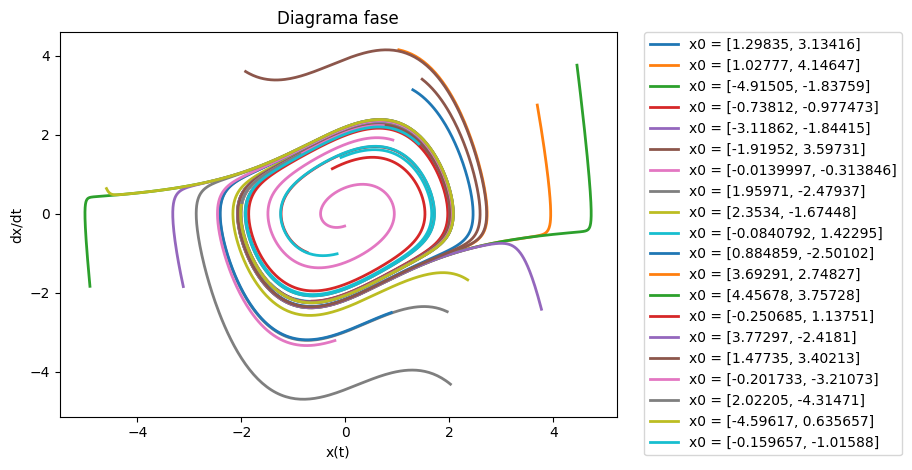

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f252203d090>

In [12]:
#Aqui se hacen las graficas del espacio fase. 
using PyPlot
plt = PyPlot


#Acorde al diagrama que nos dan deberiamos tener un punto silla. 
f(x,t) = [x[2],-x[1]+0.5*(1-x[1]^2)*x[2]]
condicionesIniciales = []
initial = -5.
final = 5.
solucion = []
xCord(x) = x[1]
yCord(x)=x[2]
derivada = []
#Llenamos el arreglo de condiciones iniciales. 
for i in 1:20
    push!(condicionesIniciales,[randomFloat(initial,final),randomFloat(initial,final)])
end

for condicion in condicionesIniciales
    solucion = rungeKutta4(f,initial,final,condicion,0.01)
    derivada = f.(solucion[2],solucion[1])
    
    
    #=Primer diagrama fase=#

    plt.xlabel("x(t)")
    plt.ylabel("dx/dt")
    plt.title("Diagrama fase")
    plt.grid()
    plt.tight_layout()
    plt.plot(xCord.(solucion[2]),xCord.(derivada),label = "x0 = $(condicion)",linewidth =2)    
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
end

    ax = gca()

    # add new limits from 0 - 100
 

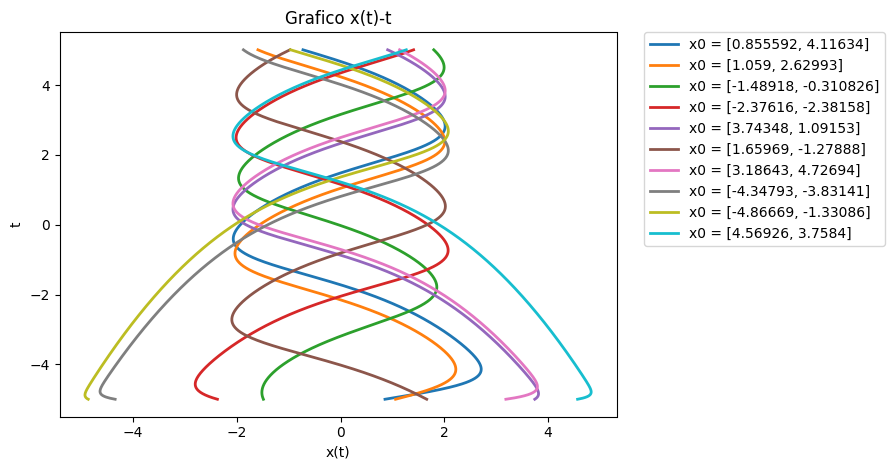

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f2521b208d0>

In [10]:
#Aqui se hacen el gráfico de (x,t)

using PyPlot
plt = PyPlot


#Acorde al diagrama que nos dan deberiamos tener un punto silla. 
f(x,t) = [x[2],-x[1]+0.5*(1-x[1]^2)*x[2]]
condicionesIniciales = []
initial = -5.
final = 5.
solucion = []
xCord(x) = x[1]
yCord(x)=x[2]

#Llenamos el arreglo de condiciones iniciales. 
for i in 1:10
    push!(condicionesIniciales,[randomFloat(initial,final),randomFloat(initial,final)])
end

for condicion in condicionesIniciales
    solucion = rungeKutta4(f,initial,final,condicion,0.01)
    
    
    #=Primer diagrama fase=#
    plt.xlabel("x(t)")
    plt.ylabel("t")
    plt.title("Grafico x(t)-t")
    plt.grid()
    plt.tight_layout()
    plt.plot(xCord.(solucion[2]),solucion[1],label = "x0 = $(condicion)",linewidth =2)    
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
    

end

    ax = gca()


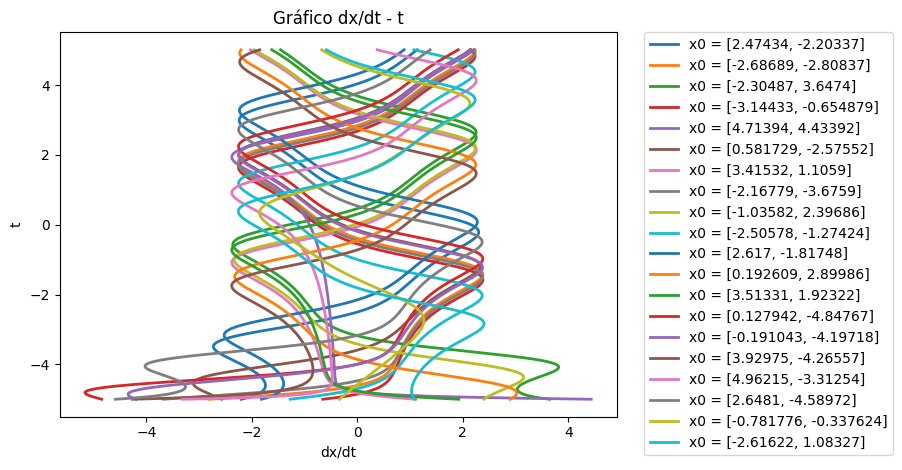

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f2520e69cd0>

In [11]:
#=Por ultiimo el gráfico dx/dx -t=#
#Aqui se hacen las graficas del espacio fase. 
using PyPlot
plt = PyPlot

f(x,t) = [x[2],-x[1]+0.5*(1-x[1]^2)*x[2]]
condicionesIniciales = []
initial = -5.
final = 5.
solucion = []
xCord(x) = x[1]
yCord(x)=x[2]
derivada = []
#Llenamos el arreglo de condiciones iniciales. 
for i in 1:20
    push!(condicionesIniciales,[randomFloat(initial,final),randomFloat(initial,final)])
end

for condicion in condicionesIniciales
    solucion = rungeKutta4(f,initial,final,condicion,0.01)
    derivada = f.(solucion[2],solucion[1])
    
    
    plt.xlabel("dx/dt")
    plt.ylabel("t")
    plt.title("Gráfico dx/dt - t")
    plt.grid()
    plt.tight_layout()
    plt.plot(xCord.(derivada),solucion[1],label = "x0 = $(condicion)",linewidth =2)    
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
end

    ax = gca()
